In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = pd.read_csv("../data/iris.csv.bz2", sep="\t")
# select only versicolor species,
# make variable names easier to handle
versicolor = iris[iris.Species == "versicolor"].rename(
    columns={"Petal.Length": "plength", "Petal.Width":"pwidth"})
# check if data looks reasonable
versicolor.head(5)

,Sepal.Length,Sepal.Width,plength,pwidth,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Text(0, 0.5, 'width (cm)')

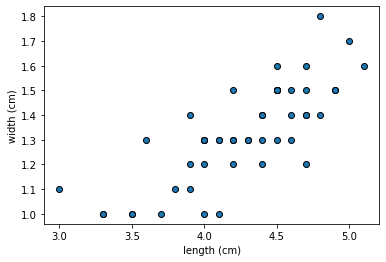

In [6]:
plt.scatter(versicolor.plength, versicolor.pwidth, edgecolors="k")
plt.xlabel("length (cm)")
plt.ylabel("width (cm)")

In [7]:
versicolor.plength.shape, versicolor.pwidth.shape

((50,), (50,))

$$
\begin{aligned}
&Select \space suitable \space values \space \beta_{0} \space \& \space \beta_{1}\\
&Calculate \space the \space predicted \space petal \space width \space \hat{w_i} = \beta_{0} + \beta_{1} * l_i\\
&Calculate \space deviations \space e_i = w_i - \hat{w_i}\\
&Calculate \space MSE = \frac{1}{N}\sum_{i}{e^2_i}\\
\end{aligned}
$$

In [8]:
beta0, beta1 = 0, 1

In [9]:
hat_w = beta0 + beta1*versicolor.plength  # note: vectorized operators!
hat_w.head(3)  # this is a series!

50    4.7
51    4.5
52    4.9
Name: plength, dtype: float64

In [10]:
e = versicolor.pwidth - hat_w
e.head(3)

50   -3.3
51   -3.0
52   -3.4
dtype: float64

In [11]:
mse = np.mean(e**2)
mse

8.7198

In [12]:
def mse(beta0, beta1):
    hat_w = beta0 + beta1*versicolor.plength  # note: vectorized operators!
    e = versicolor.pwidth - hat_w
    mse = np.mean(e**2)
    return mse

Text(0, 0.5, 'Petal width')

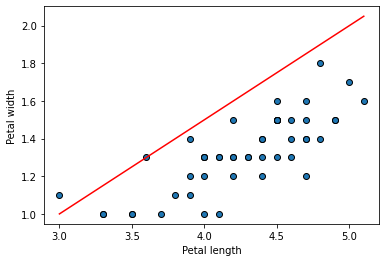

In [13]:
beta0, beta1 = -0.5, 0.5
# start by plotting the data
plt.scatter(versicolor.plength, versicolor.pwidth, edgecolor="k")
# create 11 evenly spaced lengths between the smallest and largest
# value in the data
length = np.linspace(versicolor.plength.min(), versicolor.plength.max(), 11)
# predict width
hatw = beta0 + beta1*length
plt.plot(length, hatw, c='r')
plt.xlabel("Petal length")
plt.ylabel("Petal width")